In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns
from time import perf_counter

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("budincsevity/szeged-weather")

print("Path to dataset files:", path)

100%|██████████| 2.23M/2.23M [00:00<00:00, 51.2MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/budincsevity/szeged-weather/versions/1


In [4]:
df_cols = ['Precip Type','Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)',
       'Pressure (millibars)']

In [5]:
df = pd.read_csv(path+'/weatherHistory.csv')
df = df[df_cols]
df['Precip Type'] = df['Precip Type'].map({'rain': 0, 'snow': 1})

<ipython-input-5-56438329d3ea>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Precip Type'] = df['Precip Type'].map({'rain': 0, 'snow': 1})


In [6]:
df.head()

,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,0.0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13
1,0.0,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63
2,0.0,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,0.0,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41
4,0.0,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51


In [7]:
df.corr()

,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
Precip Type,1.000000,-0.563503,-0.566058,0.232622,-0.067771,-0.042142,-0.316483,0.009271
Temperature (C),-0.563503,1.000000,0.992629,-0.632255,0.008957,0.029988,0.392847,-0.005447
Apparent Temperature (C),-0.566058,0.992629,1.000000,-0.602571,-0.056650,0.029031,0.381718,-0.000219
Humidity,0.232622,-0.632255,-0.602571,1.000000,-0.224951,0.000735,-0.369173,0.005454
Wind Speed (km/h),-0.067771,0.008957,-0.056650,-0.224951,1.000000,0.103822,0.100749,-0.049263
Wind Bearing (degrees),-0.042142,0.029988,0.029031,0.000735,0.103822,1.000000,0.047594,-0.011651
Visibility (km),-0.316483,0.392847,0.381718,-0.369173,0.100749,0.047594,1.000000,0.059818
Pressure (millibars),0.009271,-0.005447,-0.000219,0.005454,-0.049263,-0.011651,0.059818,1.000000


In [8]:
df = df.dropna()

In [9]:
df.isnull().sum()

,0
Precip Type,0
Temperature (C),0
Apparent Temperature (C),0
Humidity,0
Wind Speed (km/h),0
Wind Bearing (degrees),0
Visibility (km),0
Pressure (millibars),0


In [10]:
df.nunique()

,0
Precip Type,2
Temperature (C),7573
Apparent Temperature (C),8984
Humidity,90
Wind Speed (km/h),2484
Wind Bearing (degrees),360
Visibility (km),949
Pressure (millibars),4971


In [11]:
df.shape

(95936, 8)

In [12]:
df.drop_duplicates()
df.shape

(95936, 8)

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5]),
 [Text(0, 0.5, 'Precip Type'),
  Text(0, 1.5, 'Temperature (C)'),
  Text(0, 2.5, 'Apparent Temperature (C)'),
  Text(0, 3.5, 'Humidity'),
  Text(0, 4.5, 'Wind Speed (km/h)'),
  Text(0, 5.5, 'Wind Bearing (degrees)'),
  Text(0, 6.5, 'Visibility (km)'),
  Text(0, 7.5, 'Pressure (millibars)')])

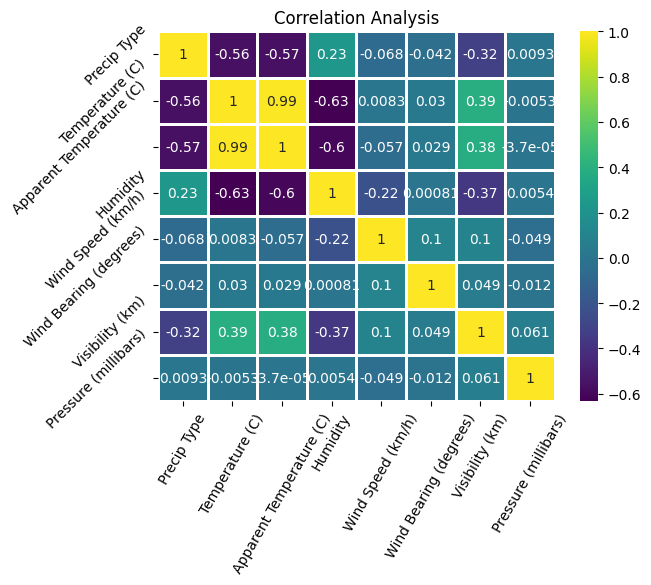

In [13]:
plt.figure(dpi=100)
plt.title('Correlation Analysis')
sns.heatmap(df.corr(), annot=True, lw=1, linecolor='white', cmap='viridis')
plt.xticks(rotation=60)
plt.yticks(rotation=45)

In [14]:
X = df.loc[:, ('Apparent Temperature (C)','Visibility (km)')]
X = X.values.reshape((-1, 2))
print(X.shape)

(95936, 2)


In [15]:
y = df.loc[:, 'Temperature (C)']
y = y.values.reshape((-1, 1))
print(y.shape)

(95936, 1)


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [17]:
model = LinearRegression().fit(X_train, y_train)
print(model.intercept_)
print(model.coef_)
t1 = perf_counter()
y_pred = model.predict(X_test)
t2 = perf_counter()
print('Time: ', t2-t1)

[1.9846231]
[[0.88128239 0.03693309]]
Time:  0.005601072000018803


In [18]:
print('MAE = ', metrics.mean_absolute_error(y_test, y_pred))
print('MSE = ', metrics.mean_squared_error(y_test, y_pred))
print('RMSE = ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
r2 = model.score(X_train, y_train)
print('R2 = ', r2)

MAE =  0.8847496552137754
MSE =  1.3215064111015389
RMSE =  1.1495679236572056
R2 =  0.9855564607995486


In [21]:
!pip install ipympl
%matplotlib widget
from google.colab import output
output.enable_custom_widget_manager()

In [29]:
from scipy.interpolate import griddata

# Create grid points for mesh
grid_x, grid_y = np.mgrid[
    X_test[:, 0].min():X_test[:, 0].max():50j,
    X_test[:, 1].min():X_test[:, 1].max():50j
]

# Interpolate real data values onto the grid
grid_z = griddata(X_test, y_test.flatten(), (grid_x, grid_y), method='linear')


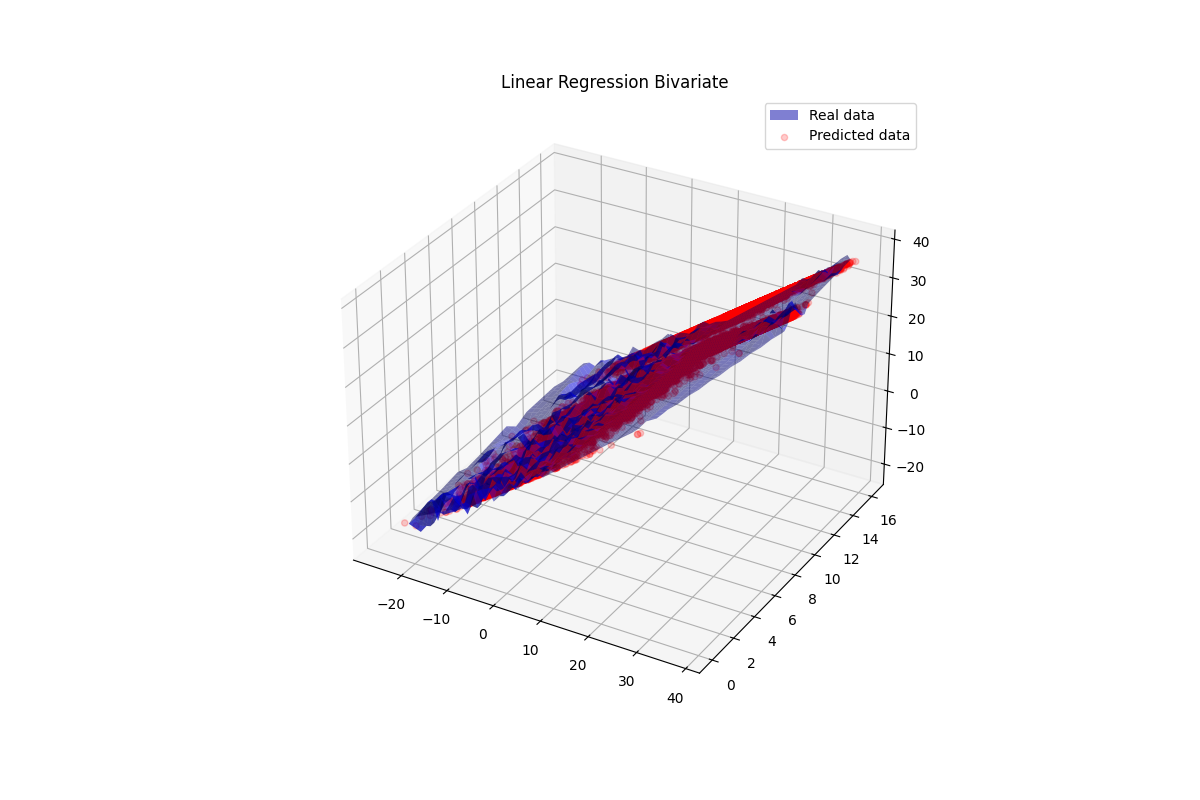

In [35]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(grid_x, grid_y, grid_z, color='blue', alpha=0.5, label='Real data')

ax.scatter(X_test[:, 0], X_test[:, 1], y_pred, color='red', alpha=0.2, label='Predicted data')


ax.set_title('Linear Regression Bivariate')
ax.legend()